In [2]:
from matplotlib import pyplot as plt
import cv2
from pytorch_msssim import ssim, ms_ssim, SSIM, MS_SSIM
import torch
import torch.nn as nn
import torchvision
import numpy as np
from tqdm.notebook import tqdm

import pywt

%matplotlib inline

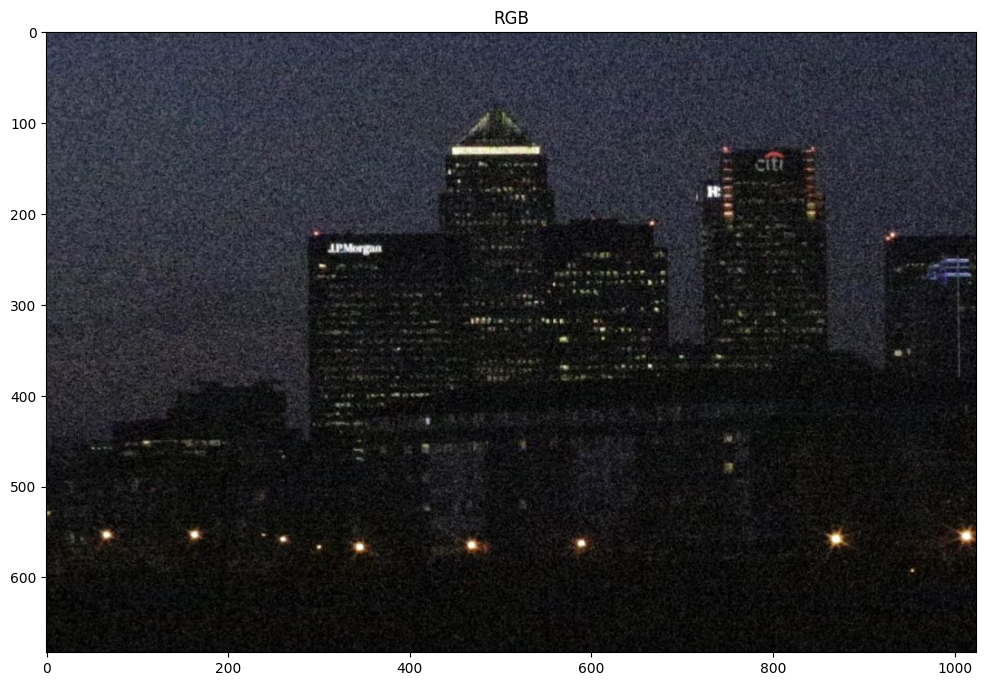

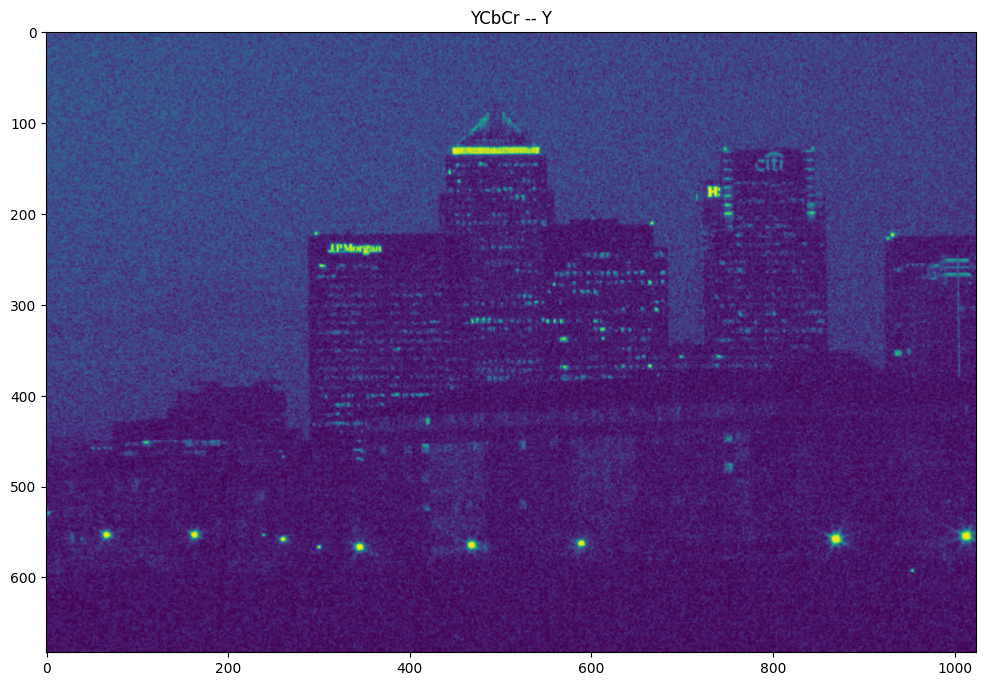

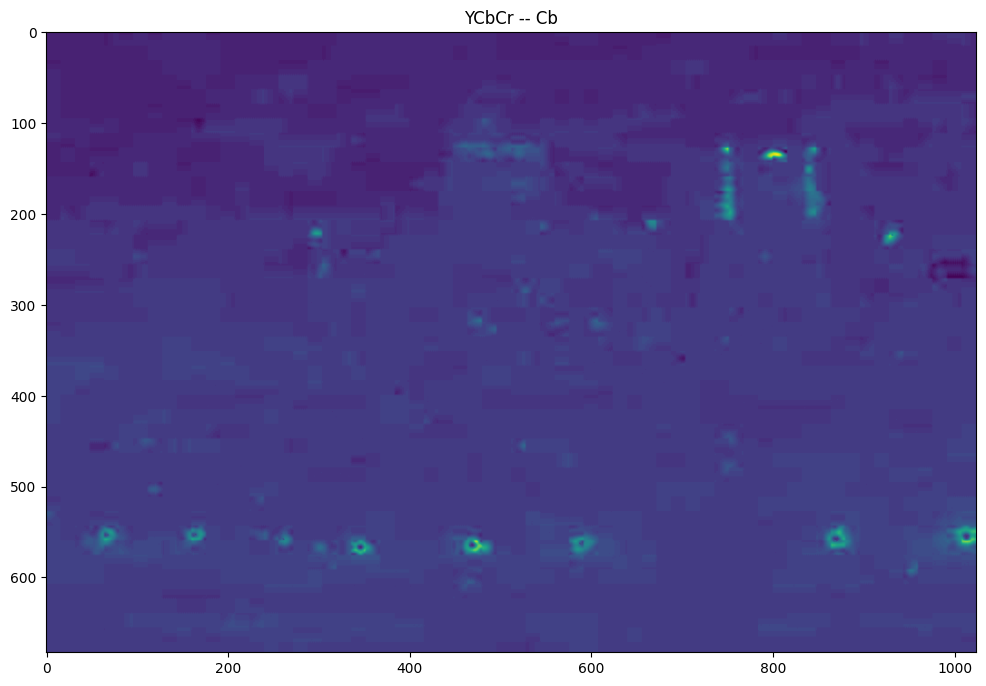

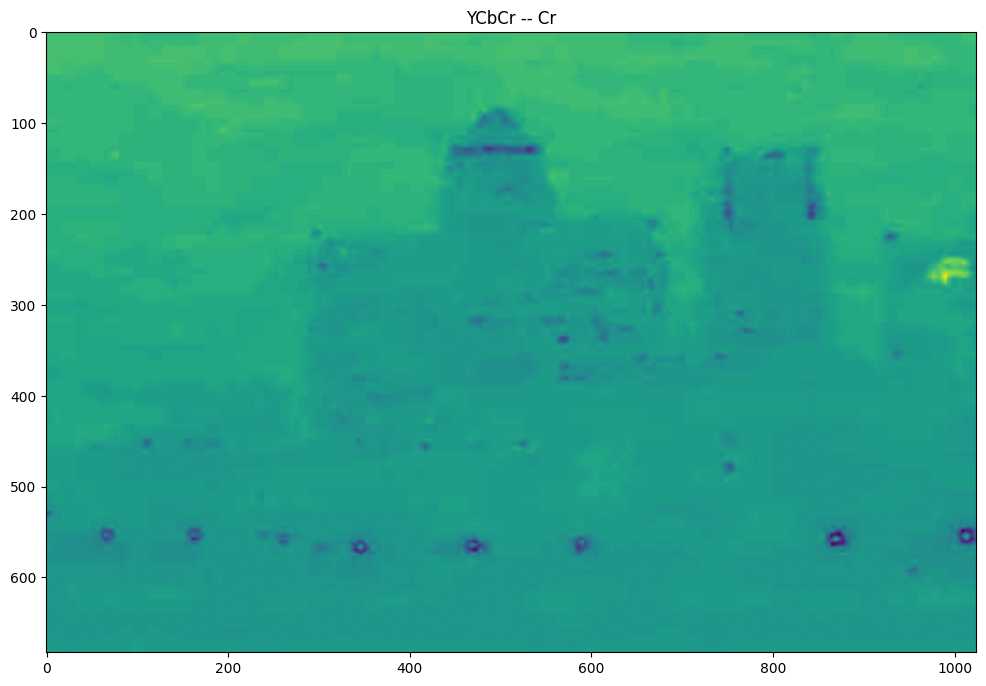

In [3]:
image_path = '/home/alexey/Downloads/iso_noisy_image.jpeg'
# image_path = '/home/alexey/Downloads/crop_noisy.png'
img = cv2.cvtColor(cv2.imread(image_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

figsize=(12, 12)

plt.figure(figsize=figsize)
plt.title('RGB')
plt.imshow(img)

ycbcr_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

# for ch_to_blur in [1, 2]:
#     ycbcr_image[ch_to_blur] = cv2.GaussianBlur(ycbcr_image[ch_to_blur], (5, 5), 1)

for i, channel in zip([0, 1, 2], ['Y', 'Cb', 'Cr']):
    plt.figure(figsize=figsize)
    plt.title('YCbCr -- {}'.format(channel))
    plt.imshow(ycbcr_image[..., i])
    
# smoothed_rgb = cv2.cvtColor(ycbcr_image, cv2.COLOR_YCrCb2RGB)

# plt.figure(figsize=figsize)
# plt.title('RGB after YCbCr smothing with PSRN: {:.2f}'.format(cv2.PSNR(img, smoothed_rgb)))
# plt.imshow(smoothed_rgb)

plt.show()

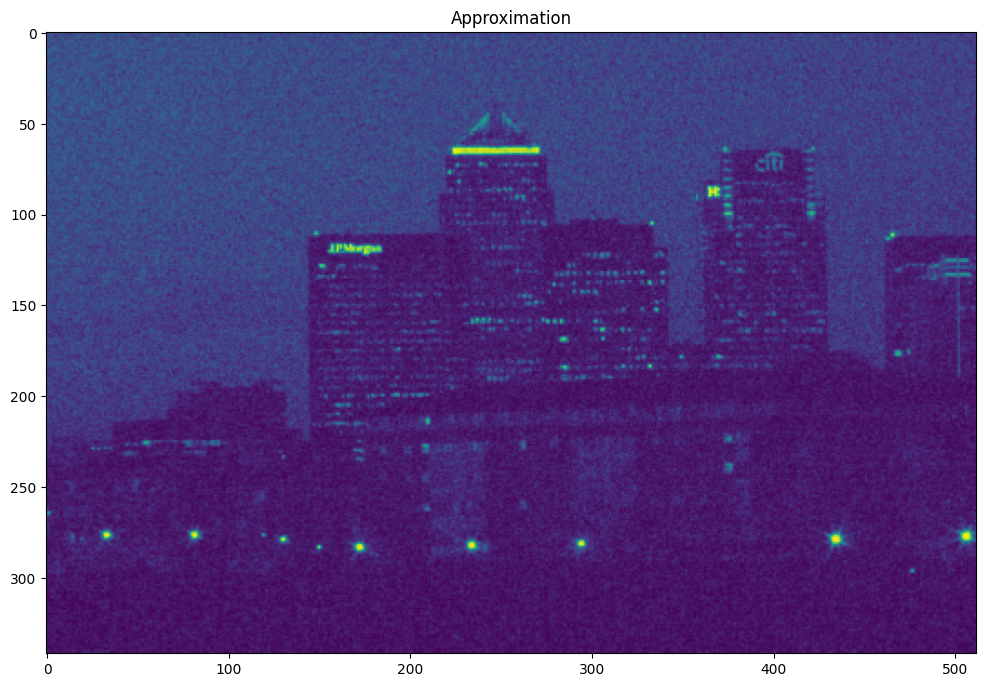

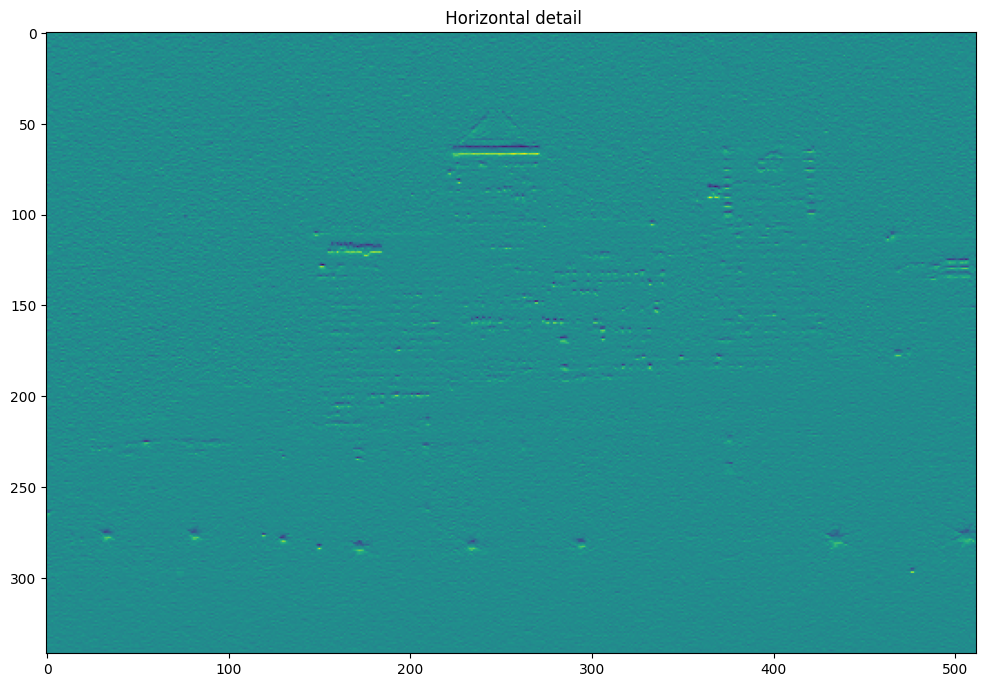

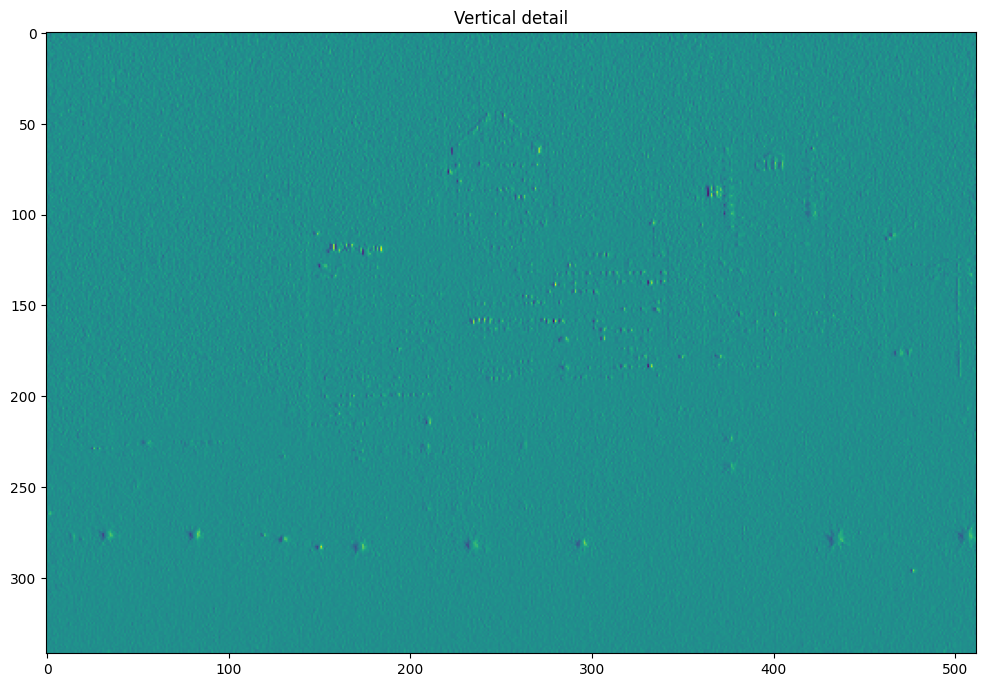

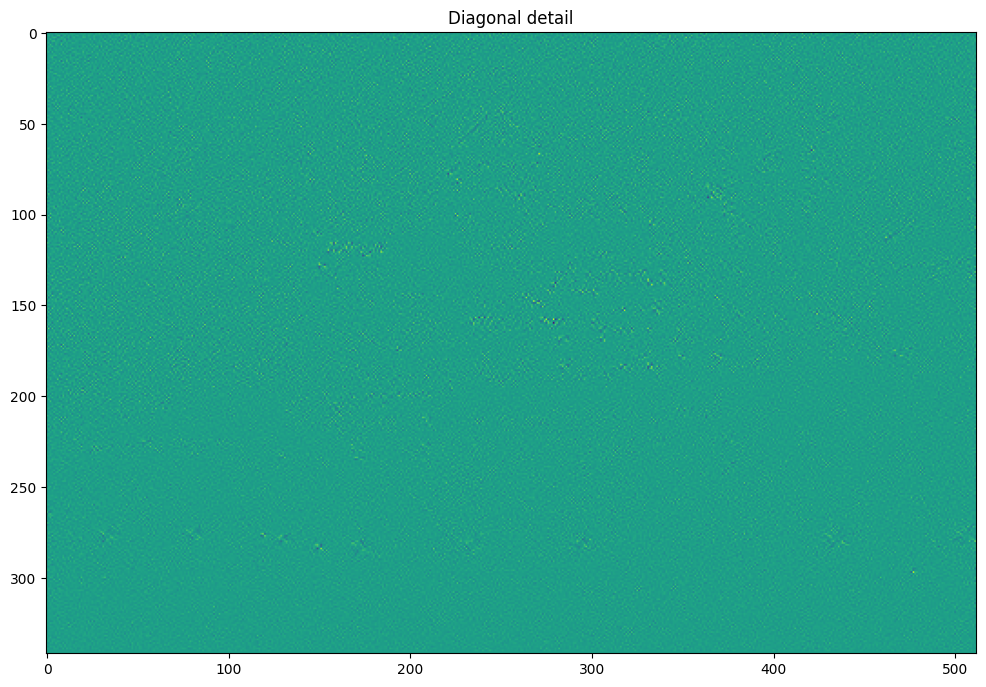

In [20]:
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']

coeffs2 = pywt.dwt2(ycbcr_image[..., 0], 'haar')

LL, (LH, HL, HH) = coeffs2
for i, a in enumerate([LL, LH, HL, HH]):
    plt.figure(figsize=figsize)
    plt.title(titles[i])
    plt.imshow(a)

plt.show()